In [1]:
%cd /home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes

import pandas as pd
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
from models.manual_implementations.glycolysis.glycolysis_model import *
import os

jax.config.update("jax_enable_x64", True)
from scripts.analysis_helper_functions.helper_function_glycolysis_analysis import load_model_glucose_pulse_FF_datasets

## Figure out what seperates the learned and initial parameters the most
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes
n_parameters 141


ModuleNotFoundError: No module named 'source'

#### Q1: Is fitting individual models better in terms of loss compared to seperate models?

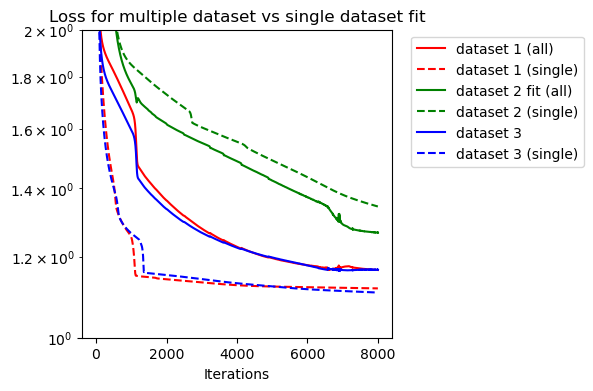

In [43]:
filepath = "results/EXP4_Glycolysis_Fitting_Datasets/"
filenames = os.listdir(filepath)
filenames_subset = []
for file in filenames:
    if "2000" in file and "losses" in file:
        if "all_pulse_datasets" in file:
            loss_all = pd.read_csv(filepath + file, index_col=0)
        elif "FF1_timeseries_format_datasets" in file:
            loss_FF1 = pd.read_csv(filepath + file, index_col=0)
        elif "losses_FF2_timeseries_format_datasets_niter" in file:
            loss_FF2 = pd.read_csv(filepath + file, index_col=0)
        elif "losses_FF3_timeseries_format_datasets_niter" in file:
            loss_FF3 = pd.read_csv(filepath + file, index_col=0)


# losses=pd.read_csv("results/EXP4_Glycolysis_Fitting_Datasets/1509_losses_ss_datasets_literature_parameter_init.csv",index_col=0)
fig, ax = plt.subplots(figsize=(4, 4))


ax.plot(loss_all["loss_per_iter1"], c="red", label="dataset 1 (all)")
ax.plot(loss_FF1, c="red", linestyle="--", label="dataset 1 (single)")

ax.plot(loss_all["loss_per_iter2"], c="green", label="dataset 2 fit (all)")
ax.plot(loss_FF2, c="green", linestyle="--", label="dataset 2 (single)")
ax.plot(loss_all["loss_per_iter3"], c="blue", label="dataset 3")
ax.plot(loss_FF3, c="blue", linestyle="--", label="dataset 3 (single)")
ax.set_ylim(1, 2)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_title("Loss for multiple dataset vs single dataset fit")
ax.set_yscale("log")
ax.set_xlabel("Iterations")
fig.savefig("figures/SI_figures/multiple_datasets.png", bbox_inches="tight")

In [15]:
loss_all

,loss_per_iter1,loss_per_iter2,loss_per_iter3
0,17.550954,675.479739,18.483440
1,17.431290,670.470780,18.365089
2,17.305681,665.207974,18.240792
3,17.174035,659.687939,18.110446
4,17.036273,653.909151,17.973953
...,...,...,...
7995,1.164593,1.266951,1.165599
7996,1.164718,1.267266,1.165133
7997,1.164595,1.266829,1.165526
7998,1.164664,1.266944,1.165253


### Q2: Do we have a nice fit for the datasets or does it require much more steps.

In [3]:
y0_dict = {
    "ICG1P": 0.064568,
    "ICT6P": 0.093705,
    "ICtreh": 63.312040,
    "ICglucose": 0.196003,
    "ICG6P": 0.716385,
    "ICF6P": 0.202293,
    "ICFBP": 0.057001,
    "ICDHAP": 0.048571,
    "ICG3P": 0.020586,
    "ICglyc": 0.1,
    "ICGAP": 0.006213,
    "ICBPG": 0.0001,
    "IC3PG": 2.311074,
    "IC2PG": 0.297534,
    "ICPEP": 1.171415,
    "ICPYR": 0.152195,
    "ICACE": 0.04,
    "ICETOH": 10.0,
    "ECETOH": 0,
    "ECglycerol": 0.0,
    "ICNADH": 0.0106,
    "ICNAD": 1.5794,
    "ICATP": 3.730584,
    "ICADP": 1.376832,
    "ICAMP": 0.431427,
    "ICPHOS": 10,
    "ICIMP": 0.100,
    "ICINO": 0.100,
    "ICHYP": 1.5,
}
y0 = jnp.array(list(y0_dict.values()))
metabolite_names = list(y0_dict.keys())

In [4]:
for file in filenames:
    if "10000" in file and "parameters" in file:
        # if "all_pulse_datasets" in file:
        #     params_step_all=pd.read_csv(filepath+file,index_col=0)
        if "step20_FF1_timeseries" in file:
            params_FF1 = pd.read_csv(filepath + file, index_col=0)
        elif "step20_FF2_timeseries" in file:
            params_FF2 = pd.read_csv(filepath + file, index_col=0)
        elif "step20_FF3_timeseries" in file:
            params_FF3 = pd.read_csv(filepath + file, index_col=0)

for file in filenames:
    if "10000" in file and "parameters" in file:
        # if "all_pulse_datasets" in file:
        #     params_step_all=pd.read_csv(filepath+file,index_col=0)
        if "optimized_parameters_FF1_timeseries" in file:
            optimized_params_FF1 = pd.read_csv(filepath + file, index_col=0)
        elif "optimized_parameters_FF2_timeseries" in file:
            optimized_params_FF2 = pd.read_csv(filepath + file, index_col=0)
        elif "optimized_parameters_FF3_timeseries" in file:
            optimized_params_FF3 = pd.read_csv(filepath + file, index_col=0)

In [5]:
glycolyse_GP1, time_points_GP1, y0_GP1, dataset_GP1 = load_model_glucose_pulse_FF_datasets(
    "FF1_timeseries_format.csv", dilution_rate="0.1", y0_dict=y0_dict
)
glycolyse_GP2, time_points_GP2, y0_GP2, dataset_GP2 = load_model_glucose_pulse_FF_datasets(
    "FF2_timeseries_format.csv", dilution_rate="0.1", y0_dict=y0_dict
)
glycolyse_GP3, time_points_GP3, y0_GP3, dataset_GP3 = load_model_glucose_pulse_FF_datasets(
    "FF3_timeseries_format.csv", dilution_rate="0.1", y0_dict=y0_dict
)
glycolyse_GP1 = jax.jit(glycolyse_GP1)
glycolyse_GP2 = jax.jit(glycolyse_GP2)

glycolyse_GP3 = jax.jit(glycolyse_GP3)

In [6]:
optim_parameters_all_datasets = (
    pd.read_csv(filepath + "2024-09-18_parameters_all_datasets_step50_10000.csv", index_col=0).iloc[-1, :].to_dict()
)

,ICG1P,ICT6P,ICtreh,ICG6P,ICF6P,ICFBP,ICGAP,IC3PG,ICPEP,ICATP,ICADP,ICAMP
0,0.064568,0.093705,63.312040,0.716385,0.202293,0.057001,0.006213,2.311074,1.171415,3.730584,1.376832,0.431427
5,0.081634,0.098474,65.302517,1.066855,0.283083,0.044107,0.005814,2.472885,1.231190,3.716214,1.483048,0.463653
10,0.083924,0.086790,61.907062,1.539130,0.398739,0.090963,0.006720,2.503573,1.144992,4.351661,1.337193,0.360864
15,0.130255,0.090381,61.755439,2.145740,0.546338,0.097653,0.006865,2.562023,1.172044,4.329230,1.262013,0.326028
20,0.166764,0.081285,63.888053,3.324030,0.871612,0.108727,0.006441,2.847641,1.171782,4.753512,1.293071,0.314410
25,0.154505,0.091596,61.504080,4.093288,1.102190,0.246773,0.016729,2.808775,1.247332,4.941099,1.090067,0.261374
30,0.221412,0.099388,60.290749,4.849431,1.300741,0.295589,0.021413,2.487284,1.094169,4.872260,0.949787,0.203678
60,0.272279,0.419512,60.887713,6.194068,1.696928,0.646634,0.023667,1.329493,0.581355,4.866601,0.868837,0.194534
90,0.202877,0.575306,62.025089,5.421728,1.520833,0.362924,0.016827,2.158167,0.911659,4.792161,1.059617,0.250142
120,0.140918,0.470424,62.723745,4.191109,1.152367,0.295014,0.017292,2.529920,1.061704,4.749100,1.060200,0.258565


In [56]:
def plot_timeseries(glycolyse_model, y0_dict, time_points, met_name, optim_parameter, metabolite_names, dataset, ax):
    ts_test = jnp.linspace(0, time_points[-1], 1000)

    # for i in range(0,len(parameters_step_dict),5):

    #     ys=glycolyse_model(ts=ts_test,y0=jnp.array(list(y0_GP1.values())),params=parameters_step_dict.iloc[i,:].to_dict())
    #     ys=pd.DataFrame(ys,columns=metabolite_names)
    #     ax.plot(ts_test,ys[met_name],label=met_name,c="blue",linewidth=0.2,alpha=0.8)
    dataset = dataset.dropna(axis=1)
    ys = glycolyse_model(ts=ts_test, y0=jnp.array(list(y0_dict.values())), params=optim_parameter)
    ys = pd.DataFrame(ys, columns=metabolite_names)
    # ax.set_xlabel("Time (in seconds)")
    # ax.set_ylabel("Concentration (in mM)")
    lancet_colors = ["#00468BFF", "#ED0000FF", "#925E9FFF", "#AD002AFF", "#ADB6B6FF"]
    for i in range(len(met_name)):
        try:
            ax.scatter(time_points, dataset[met_name[i]], c=lancet_colors[i], s=6)
            ax.plot(ts_test, ys[met_name[i]], label=met_name[i], c=lancet_colors[i], linewidth=2)

        except:
            #     print("yes")
            ax.plot(ts_test, ys[met_name[i]], label=met_name[i], c=lancet_colors[i], linewidth=2, linestyle="--")
            continue
    return ax

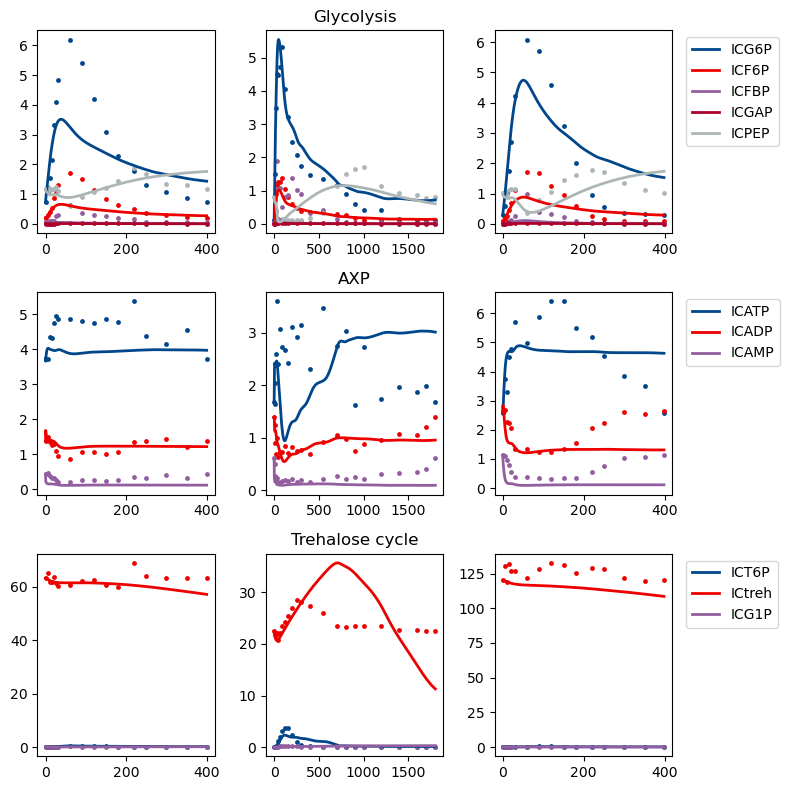

In [57]:
nrows = 3
fig, axs = plt.subplots(nrows, 3, figsize=(8, 8))  # 1 row, 3 columns
# mets_to_plot=["ICG6P","ICF6P","ICFBP",]
mets_to_plot = [["ICG6P", "ICF6P", "ICFBP", "ICGAP", "ICPEP"], ["ICATP", "ICADP", "ICAMP"], ["ICT6P", "ICtreh", "ICG1P"]]
titles_name = ["Glycolysis", "AXP", "Trehalose cycle", "Glycerophospholipid", "Cofactors"]
for i in range(nrows):
    met_name = mets_to_plot[i]
    axs[i, 0] = plot_timeseries(
        glycolyse_model=glycolyse_GP1,
        time_points=time_points_GP1,
        y0_dict=y0_GP1,
        met_name=met_name,
        optim_parameter=optim_parameters_all_datasets,
        metabolite_names=metabolite_names,
        dataset=dataset_GP1,
        ax=axs[i, 0],
    )

    axs[i, 1] = plot_timeseries(
        glycolyse_model=glycolyse_GP2,
        time_points=time_points_GP2,
        met_name=met_name,
        y0_dict=y0_GP2,
        optim_parameter=optim_parameters_all_datasets,
        metabolite_names=metabolite_names,
        dataset=dataset_GP2,
        ax=axs[i, 1],
    )
    axs[i, 1].set_title(titles_name[i])
    axs[i, 2] = plot_timeseries(
        glycolyse_model=glycolyse_GP3,
        time_points=time_points_GP3,
        y0_dict=y0_GP3,
        met_name=met_name,
        optim_parameter=optim_parameters_all_datasets,
        metabolite_names=metabolite_names,
        dataset=dataset_GP3,
        ax=axs[i, 2],
    )
    axs[i, 2].legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.tight_layout()

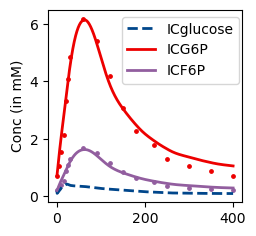

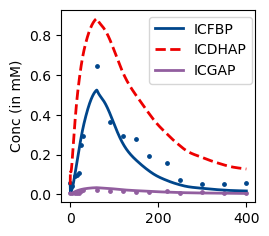

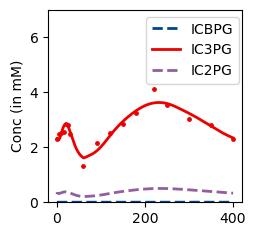

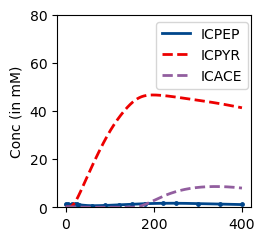

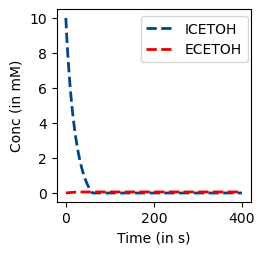

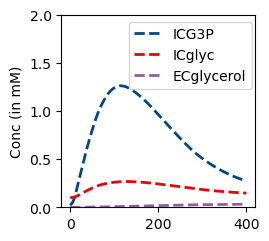

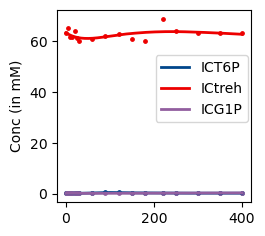

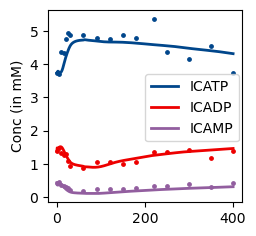

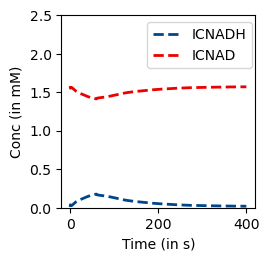

In [69]:
met_name = ["ICglucose", "ICG6P", "ICF6P"]

name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig, ax = plt.subplots(figsize=(2.5, 2.5))
plot_timeseries(
    glycolyse_model=glycolyse_GP1,
    time_points=time_points_GP1,
    y0_dict=y0_GP1,
    met_name=met_name,
    optim_parameter=optimized_params_FF1.to_dict()["0"],
    metabolite_names=metabolite_names,
    dataset=dataset_GP1,
    ax=ax,
)


ax.legend(loc="upper right", bbox_to_anchor=(1.02, 1))
ax.set_ylabel("Conc (in mM)")
# ax.set_xlabel("Time (in s)")
name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig.savefig(name_to_save, bbox_inches="tight")


met_name = ["ICFBP", "ICDHAP", "ICGAP"]

name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig, ax = plt.subplots(figsize=(2.5, 2.5))
plot_timeseries(
    glycolyse_model=glycolyse_GP1,
    time_points=time_points_GP1,
    y0_dict=y0_GP1,
    met_name=met_name,
    optim_parameter=optimized_params_FF1.to_dict()["0"],
    metabolite_names=metabolite_names,
    dataset=dataset_GP1,
    ax=ax,
)


ax.legend(loc="upper right", bbox_to_anchor=(1.02, 1))
ax.set_ylabel("Conc (in mM)")
# ax.set_xlabel("Time (in s)")
name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig.savefig(name_to_save, bbox_inches="tight")


met_name = ["ICBPG", "IC3PG", "IC2PG"]

name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig, ax = plt.subplots(figsize=(2.5, 2.5))
plot_timeseries(
    glycolyse_model=glycolyse_GP1,
    time_points=time_points_GP1,
    y0_dict=y0_GP1,
    met_name=met_name,
    optim_parameter=optimized_params_FF1.to_dict()["0"],
    metabolite_names=metabolite_names,
    dataset=dataset_GP1,
    ax=ax,
)
ax.set_ylabel("Conc (in mM)")
# ax.set_xlabel("Time (in s)")

ax.set_ylim(0, 7)
ax.legend(loc="upper right", bbox_to_anchor=(1.02, 1))
ax.set_ylabel("Conc (in mM)")
name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig.savefig(name_to_save, bbox_inches="tight")

met_name = ["ICPEP", "ICPYR", "ICACE"]

name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig, ax = plt.subplots(figsize=(2.5, 2.5))
plot_timeseries(
    glycolyse_model=glycolyse_GP1,
    time_points=time_points_GP1,
    y0_dict=y0_GP1,
    met_name=met_name,
    optim_parameter=optimized_params_FF1.to_dict()["0"],
    metabolite_names=metabolite_names,
    dataset=dataset_GP1,
    ax=ax,
)
ax.set_ylabel("Conc (in mM)")


ax.set_ylim(0, 80)
ax.legend(loc="upper right", bbox_to_anchor=(1.02, 1))
ax.set_ylabel("Conc (in mM)")
name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig.savefig(name_to_save, bbox_inches="tight")


met_name = ["ICETOH", "ECETOH"]

name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig, ax = plt.subplots(figsize=(2.5, 2.5))
plot_timeseries(
    glycolyse_model=glycolyse_GP1,
    time_points=time_points_GP1,
    y0_dict=y0_GP1,
    met_name=met_name,
    optim_parameter=optimized_params_FF1.to_dict()["0"],
    metabolite_names=metabolite_names,
    dataset=dataset_GP1,
    ax=ax,
)
ax.set_ylabel("Conc (in mM)")
ax.set_xlabel("Time (in s)")


ax.legend(loc="upper right", bbox_to_anchor=(1.02, 1))
ax.set_ylabel("Conc (in mM)")
# ax.set_xlabel("Time (in s)")
name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig.savefig(name_to_save, bbox_inches="tight")


met_name = ["ICG3P", "ICglyc", "ECglycerol"]

name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig, ax = plt.subplots(figsize=(2.5, 2.5))
plot_timeseries(
    glycolyse_model=glycolyse_GP1,
    time_points=time_points_GP1,
    y0_dict=y0_GP1,
    met_name=met_name,
    optim_parameter=optimized_params_FF1.to_dict()["0"],
    metabolite_names=metabolite_names,
    dataset=dataset_GP1,
    ax=ax,
)
ax.set_ylabel("Conc (in mM)")

ax.set_ylim(0, 2)
ax.legend(loc="upper right", bbox_to_anchor=(1.02, 1))
ax.set_ylabel("Conc (in mM)")
# ax.set_xlabel("Time (in s)")
name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig.savefig(name_to_save, bbox_inches="tight")


met_name = ["ICT6P", "ICtreh", "ICG1P"]

name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig, ax = plt.subplots(figsize=(2.5, 2.5))
plot_timeseries(
    glycolyse_model=glycolyse_GP1,
    time_points=time_points_GP1,
    y0_dict=y0_GP1,
    met_name=met_name,
    optim_parameter=optimized_params_FF1.to_dict()["0"],
    metabolite_names=metabolite_names,
    dataset=dataset_GP1,
    ax=ax,
)
ax.set_ylabel("Conc (in mM)")

ax.legend(loc="upper right", bbox_to_anchor=(1.02, 0.8))
ax.set_ylabel("Conc (in mM)")
# ax.set_xlabel("Time (in s)")
name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig.savefig(name_to_save, bbox_inches="tight")

met_name = ["ICATP", "ICADP", "ICAMP"]

name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig, ax = plt.subplots(figsize=(2.5, 2.5))
plot_timeseries(
    glycolyse_model=glycolyse_GP1,
    time_points=time_points_GP1,
    y0_dict=y0_GP1,
    met_name=met_name,
    optim_parameter=optimized_params_FF1.to_dict()["0"],
    metabolite_names=metabolite_names,
    dataset=dataset_GP1,
    ax=ax,
)
ax.set_ylabel("Conc (in mM)")
# ax.set_xlabel("Time (in s)")
ax.legend(loc="upper right", bbox_to_anchor=(1.02, 0.7))

name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig.savefig(name_to_save, bbox_inches="tight")


met_name = ["ICNADH", "ICNAD"]

name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig, ax = plt.subplots(figsize=(2.5, 2.5))
plot_timeseries(
    glycolyse_model=glycolyse_GP1,
    time_points=time_points_GP1,
    y0_dict=y0_GP1,
    met_name=met_name,
    optim_parameter=optimized_params_FF1.to_dict()["0"],
    metabolite_names=metabolite_names,
    dataset=dataset_GP1,
    ax=ax,
)
ax.set_ylabel("Conc (in mM)")
ax.set_xlabel("Time (in s)")
ax.set_ylim(0, 2.5)
ax.legend(loc="upper right", bbox_to_anchor=(1.02, 1))
ax.set_ylabel("Conc (in mM)")
ax.set_xlabel("Time (in s)")
name_to_save = f"figures/figures_glycolysis/{met_name[0]}_FF1_timeplot.svg"
fig.savefig(name_to_save, bbox_inches="tight")

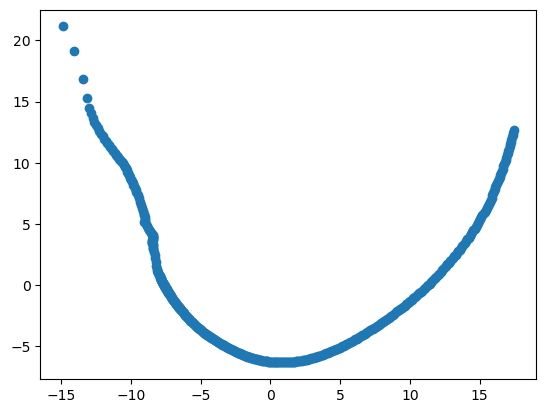

In [165]:
pca = PCA(n_components=2)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(params_FF1)
X_embedded = pca.fit_transform(scaled_data)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

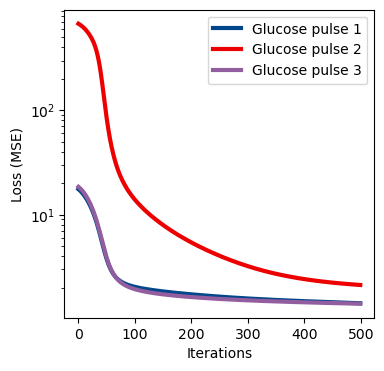

In [233]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(loss_FF1.iloc[0:500, :], label="Glucose pulse 1", c="#00468BFF", linewidth=3)
ax.plot(loss_FF2.iloc[0:500, :], label="Glucose pulse 2", c="#ED0000FF", linewidth=3)
ax.plot(loss_FF3.iloc[0:500, :], label="Glucose pulse 3", c="#925E9FFF", linewidth=3)
ax.set_ylabel("Loss (MSE)")
ax.set_xlabel("Iterations")
ax.legend()
ax.set_yscale("log")
fig.savefig("figures/figures_glycolysis/Loss_per_dataset.svg", bbox_inches="tight")
fig.savefig("figures/figures_glycolysis/Loss_per_dataset.png", bbox_inches="tight")

In [3]:
1e-3
100e-3

0.1